<a href="https://colab.research.google.com/github/pachterlab/BLCSBGLKP_2020/blob/master/notebooks/lampseq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!date

Mon Nov  2 20:31:52 UTC 2020


In [2]:
!git clone https://github.com/pachterlab/BLCSBGLKP_2020.git
!mkdir temporary

Cloning into 'BLCSBGLKP_2020'...
remote: Enumerating objects: 232, done.
remote: Counting objects: 100% (232/232), done.
remote: Compressing objects: 100% (213/213), done.
remote: Total 232 (delta 85), reused 85 (delta 14), pack-reused 0
Receiving objects: 100% (232/232), 42.23 MiB | 27.37 MiB/s, done.
Resolving deltas: 100% (85/85), done.


In [3]:
!pip install anndata

     |████████████████████████████████| 122kB 3.3MB/s 


# LampSeq

Forward primer -- Viral genome sequence -- FIP primer -- Barcode -- FIP Primer
>A_F3
TCCAGATGAGGATGAAGAAGA
>B_F3
TGGCTACTACCGAAGAGCT
>C_F3
AACACAAGCTTTCGGCAG

>A_B3
AGTCTGAACAACTGGTGTAAG
>B_B3
TGCAGCATTGTTAGCAGGAT
>C_B3
GAAATTTGGATCTTTGTCATCC

A-FIP-Barcode	AGAGCAGCAGAAGTGGCACNNNNNNNNNNAGGTGATTGTGAAGAAGAAGAG
B-FIP-Barcode	TCTGGCCCAGTTCCTAGGTAGTNNNNNNNNNNCCAGACGAATTCGTGGTGG
C-FIP-Barcode	TGCGGCCAATGTTTGTAATCAGNNNNNNNNNNCCAAGGAAATTTTGGGGAC




>B_B3
TGCAGCATTGTTAGCAGGAT

Read will look like
B_B3 - B-FIP-Barcode	
read: TGCAGCATTGTTAGCAGGAT TCTGGCCCAGTTCCTAGGTAGT NNNNNNNNNN CCAGACGAATTCGTGGTGG
biological: 0, 20
FIP : 20, 42
Barcode: 42, 52
FIP:: 52, end

In [4]:
# We need cmake to install kallisto and bustools from source
!apt update
!apt install -y cmake
!apt-get install autoconf

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [40.1 kB]
Hit:13 http://ppa.launchpad.net/graph

In [5]:
!git clone https://github.com/pachterlab/kallisto.git
!mv kallisto/ temporary/
!cd temporary/kallisto && git checkout covid && mkdir build && cd build && cmake .. && make
!chmod +x temporary/kallisto/build/src/kallisto
!mv temporary/kallisto/build/src/kallisto /usr/local/bin/

Cloning into 'kallisto'...
remote: Enumerating objects: 3857, done.
remote: Total 3857 (delta 0), reused 0 (delta 0), pack-reused 3857
Receiving objects: 100% (3857/3857), 4.08 MiB | 15.13 MiB/s, done.
Resolving deltas: 100% (2514/2514), done.
Branch 'covid' set up to track remote branch 'covid' from 'origin'.
Switched to a new branch 'covid'
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
shared build
-- Looking for pthread.h
-- Looking for pthread.

In [6]:
!git clone https://github.com/BUStools/bustools.git
!mv bustools/ temporary/
!cd temporary/bustools && git checkout covid && mkdir build && cd build && cmake .. && make
!chmod +x temporary/bustools/build/src/bustools
!mv temporary/bustools/build/src/bustools /usr/local/bin/

Cloning into 'bustools'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 907 (delta 33), reused 33 (delta 16), pack-reused 856
Receiving objects: 100% (907/907), 604.53 KiB | 6.04 MiB/s, done.
Resolving deltas: 100% (552/552), done.
Branch 'covid' set up to track remote branch 'covid' from 'origin'.
Switched to a new branch 'covid'
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detectin

In [7]:
!kallisto version
!bustools version

kallisto, version 0.46.2
bustools, version 0.40.0


In [8]:
!kallisto index -i ./temporary/lamp_index.idx -k 9 BLCSBGLKP_2020/data/lampseq/transcriptome.fa


[build] loading fasta file BLCSBGLKP_2020/data/lampseq/transcriptome.fa
[build] k-mer length: 9
[build] counting k-mers ... done.
[build] building target de Bruijn graph ...  done 
[build] creating equivalence classes ...  done
[build] target de Bruijn graph has 1 contigs and contains 12 k-mers 



In [9]:
!kallisto bus -x LAMPSeq -t 2 -o ./temporary/out_lamp -i ./temporary/lamp_index.idx BLCSBGLKP_2020/data/lampseq/R1.fastq.gz 


[index] k-mer length: 9
[index] number of targets: 1
[index] number of k-mers: 12
[index] number of equivalence classes: 1
[quant] will process sample 1: BLCSBGLKP_2020/data/lampseq/R1.fastq.gz
[quant] finding pseudoalignments for the reads ... done
[quant] processed 3,651,675 reads, 3,649,199 reads pseudoaligned


In [10]:
# sort the BUS file by barcode
!bustools sort -t 2 -m 1G -o temporary/out_lamp/sort.bus temporary/out_lamp/output.bus
# Correct to the barcodes in the whitelist (obtained from the SampleSheet)
!bustools correct -d temporary/out_lamp/dump.txt -w BLCSBGLKP_2020/data/lampseq/whitelist.txt  -o temporary/out_lamp/sort.correct.bus temporary/out_lamp/sort.bus
# Sort again to sum the Amplicon counts
!bustools sort -t 2 -m 1G -o temporary/out_lamp/sort.correct.sort.bus temporary/out_lamp/sort.correct.bus

# write busfile to text output
!bustools text -p temporary/out_lamp/sort.correct.sort.bus > temporary/out_lamp/data.txt

# Write the sorted bus file out for barcode QC
!bustools text -p temporary/out_lamp/sort.bus > temporary/out_lamp/sort.txt

tcmalloc: large alloc 1073741824 bytes == 0x555fb0120000 @  0x7ff8a579d887 0x555fae4f13fd 0x555fae4b2f4a 0x7ff8a461db97 0x555fae4b407a
Read in 3649199 BUS records
Found 96 barcodes in the whitelist
Processed 4705 BUS records
In whitelist = 96
Corrected    = 1488
Uncorrected  = 3121
tcmalloc: large alloc 1073741824 bytes == 0x557119094000 @  0x7f7f20bd5887 0x55711853b3fd 0x5571184fcf4a 0x7f7f1fa55b97 0x5571184fe07a
Read in 1584 BUS records
Read in 96 BUS records
Read in 4705 BUS records


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import anndata

from collections import defaultdict
from collections import OrderedDict


from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
import matplotlib.patches as mpatches



from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.special import expit as sigmoid

def nd(arr):
    return np.asarray(arr).reshape(-1)

def yex(ax):
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    
    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    return ax

cm = {1:"#D43F3A", 0:"#3182bd"}
fsize=20

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

In [12]:
df = pd.read_csv("temporary/out_lamp/data.txt", sep="\t", header=None, names=["bcs", "umi", "ecs", "cnt"])

In [13]:
s = df.groupby("bcs")[["cnt"]].sum()

In [14]:
s.head()

,cnt
bcs,
AAACGCTCAC,3893
AAAGGGAACT,37
AAATCGGCGT,2888
AAGACTGGTT,79
AAGTATCTCC,302500


# Load map between

In [15]:
m = pd.read_csv( "BLCSBGLKP_2020/data/lampseq/ss2lamp.txt", sep="\t", header=None, names=["ss_bcs", "lamp_bcs"])

In [16]:
m.head()

,ss_bcs,lamp_bcs
0,AAGCTCCTAGTTGCGC,CTTTCCGTCC
1,AAGCTCCTCAGATCTT,CCTATAACGT
2,AAGCTCCTCTGTTACA,CCGACTGAAA
3,AAGCTCCTTCATGACA,TATCGCGAGT
4,AATCGTCTAGTTGCGC,ATACCGTTCT


In [17]:
kb_raw = anndata.read_h5ad("BLCSBGLKP_2020/data/kb/adata.h5ad")
kb_raw.obs.index = kb_raw.obs.bcs.values

In [18]:
kb_raw

AnnData object with n_obs × n_vars = 768 × 5
    obs: 'bcs', 'ecs', 'cnt', 'plate', 'well', 'lysate', 'Twist', 'ATCC_RNA', 'ATCC_viral', 'Twist_bool', 'ATCC_viral_bool', 'ATCC_RNA_bool'
    var: 'gene'
    obsm: 'X_pca'
    layers: 'log1p', 'norm', 'raw', 'scale'

In [19]:
a = np.logical_and((kb_raw.obs.plate=="Plate1").values, (kb_raw.obs.lysate=="HEK293").values)
b = np.logical_and(a, kb_raw.obs.ATCC_RNA.values==0)
c = np.logical_and(b, kb_raw.obs.ATCC_viral.values==0)

kb = kb_raw[b]

/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [20]:
s = s.loc[m.lamp_bcs]

In [21]:
kb = kb[kb.obs.loc[m.ss_bcs].index]


/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [22]:
g = "N1"

a = nd(s.cnt.values)
b = nd(kb.layers['raw'][:,kb.var.gene==g])

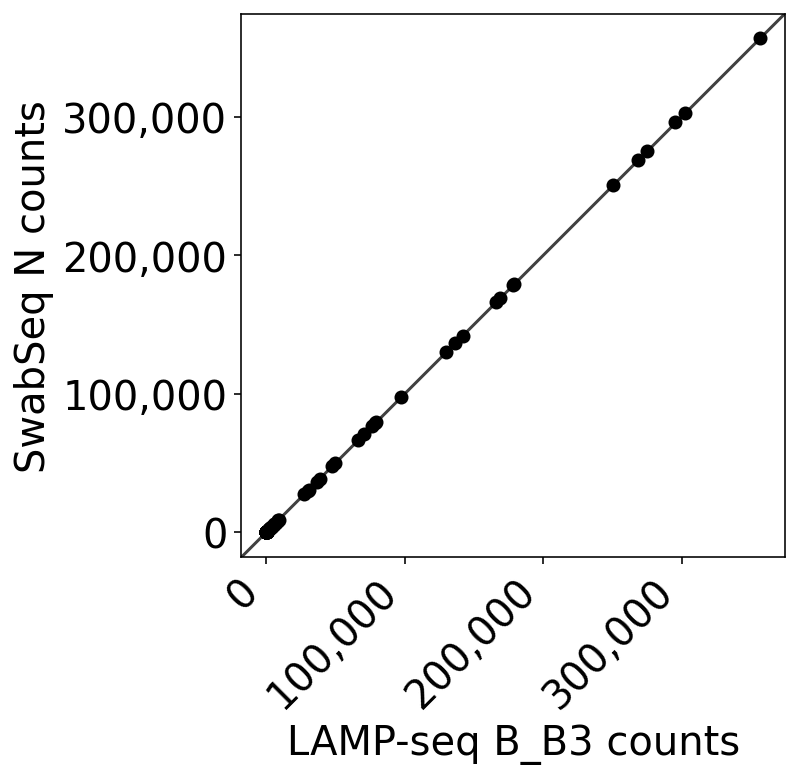

In [23]:
fig, ax = plt.subplots(figsize=(5,5))

x = a
y = b

ax.scatter(x, y, color="k")
yex(ax)

ax.set_xlabel("LAMP-seq {} counts".format("B_B3"))
ax.set_ylabel("SwabSeq {} counts".format(g[0]))
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)
    

#plt.savefig("./figs/ss_v_lamp.png",bbox_inches='tight', dpi=300)

plt.show()